## CNN

**STEPS INVOLVED:**
1. Import the libraries
2. Image Processing and Data Augmentation
3. Initialize the model
4. Add Convolution Layer _(image size, how many feature detectors, size of featire detectors)_
5. Add Pooling Layer
6. Add Flatten Layer
7. Add I/P layer
8. Add Hidden Layers
9. Add O/P Layer
10. Compile the process
11. Train the data
12. Save the model
13. Test the model

**HOW TO MAKE A DATASET?**
1. ***Make a main folder for categorical o/p***

> Inside it, _Test Folder_ : chairs (30 images), pens (30), fans (30), tables(30)

> _Train Folder_ : chairs (70), pens (70), fans (70), tables (70)

2. ***Make a main folder for classification o/p***

> _Test Set_: healthy (30), non-healthy (30)

> _Train set_: healthy (70), non-healthy (70)

3. ___Higher the images, higher the accuracy___

## 1. Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout

## 2. Image Preprocessing
> **Augmenting** the images by applying some more featires and rescaling it.

> ___Augmentation:___ In order to make the training more accurate, train the images from different angles. **Rescaling** the images

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# rescale - scaling the images into a single range
# Here, the image is getting zoomed and flipped
# shear_range - the image can be stretched either in the s or y direction (stretched images)

train_datagen = ImageDataGenerator (rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator (rescale = 1./255)

In [3]:
# Since all the images are of different sizes, we make them of similar sizes using target_size
# batch size indicates the number of images whihc will be trained in a batch

x_train = train_datagen.flow_from_directory(r'C:\Users\anann\OneDrive\Desktop\College\AI_SmartBridge\CNN\Crop-animal data\trainset', target_size = (64,64),batch_size = 32,class_mode = "categorical"
)
x_test = test_datagen.flow_from_directory(r'C:\Users\anann\OneDrive\Desktop\College\AI_SmartBridge\CNN\Crop-animal data\testset', target_size = (64,64),batch_size = 32,class_mode = "categorical"
)

Found 1495 images belonging to 5 classes.
Found 640 images belonging to 5 classes.


In [4]:
x_train.class_indices

{'bears': 0, 'crows': 1, 'elephants': 2, 'racoons': 3, 'rats': 4}

## 3. Initialize the model

In [5]:
model = Sequential()

## 4. Add Convolutional Layer

In [6]:
# no of feature detectors = 32
# size of feature detectors = (3,3)
# image size = 64, 64
# 3 indicates RGB (3 channels) for colored images

model.add(Convolution2D(32, (3,3), input_shape = (64,64,3)))

## 5. Add Pooling Layer

In [7]:
# Add pool size, the conventional size is 2 by 2

model.add(MaxPooling2D ((2,2)))

In [8]:
# Add another convolution layer
model.add(Convolution2D(32, (3,3), input_shape = (64,64,3)))

In [9]:
# Adding another max pool for the above convolution layer
model.add(MaxPooling2D ((2,2)))

## 6. Add Flatten/Input Layer

In [10]:
model.add(Flatten())

## 7. Add Hidden Layers

In [11]:
model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))

In [12]:
# Randomly turn neurons on and off to improve convergence
# Add dropout layer
model.add(Dropout(0.3)) 

In [13]:
model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))

In [14]:
# Add another Dropout layer
model.add(Dropout(0.3))

In [15]:
model.add(Dense(units = 128, kernel_initializer = "random_uniform", activation ="relu"))

In [16]:
model.add(Dropout(0.3))

## 8. Add Ouput Layer

In [17]:
model.add(Dense(units = 5, kernel_initializer = "random_uniform", activation ="softmax"))

## 9. Compile the Process

In [18]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

> steps per epoch is the number of images the model is trained on -> **number of images in train set / batch size** = 1495/32

> validation steps is the no of images the model tests upon -> no of **images in test set / batch size** = 640/32

In [19]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

## 10. Train the data

In [20]:
 
hist = model.fit_generator(x_train,steps_per_epoch = 47 , epochs = 50 , validation_data = x_test, validation_steps = 20, callbacks=[early_stop])

C:\Users\anann\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
47/47 [==============================] - 9s 184ms/step - loss: 1.5942 - accuracy: 0.2468 - val_loss: 1.4748 - val_accuracy: 0.5781
Epoch 2/50
47/47 [==============================] - 10s 221ms/step - loss: 1.4900 - accuracy: 0.3130 - val_loss: 1.1827 - val_accuracy: 0.6203
Epoch 3/50
47/47 [==============================] - 11s 238ms/step - loss: 1.3380 - accuracy: 0.4609 - val_loss: 0.9602 - val_accuracy: 0.6469
Epoch 4/50
47/47 [==============================] - 10s 210ms/step - loss: 1.1747 - accuracy: 0.5331 - val_loss: 1.0162 - val_accuracy: 0.6156
Epoch 5/50
47/47 [==============================] - 10s 212ms/step - loss: 1.1012 - accuracy: 0.5672 - val_loss: 0.9857 - val_accuracy: 0.5906
Epoch 6/50
47/47 [==============================] - 10s 225ms/step - loss: 0.9997 - accuracy: 0.6040 - val_loss: 0.8877 - val_accuracy: 0.6391
Epoch 7/50
47/47 [==============================] - 11s 233ms/step - loss: 0.9414 - accuracy: 0.6428 - val_loss: 0.7408 - val_accuracy: 0.7156


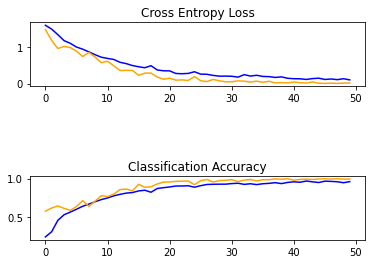

In [21]:
# Plotting
import matplotlib.pyplot as plt

# plot loss
plt.subplot(3,1,1)
plt.title('Cross Entropy Loss')
plt.plot(hist.history['loss'], color='blue', label='train')
plt.plot(hist.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(3,1,3)
plt.title('Classification Accuracy')
plt.plot(hist.history['accuracy'], color='blue', label='train')
plt.plot(hist.history['val_accuracy'], color='orange', label='test')

## 11. Save the model

In [23]:
model.save('animal.h5')

## 12. Test the model
1. Import libraries
2. Load the model
3. Load the image
4. Convert the image to CNN architecture
5. Predict the image

### a. Import Libraries

In [24]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

### b. Load the model

In [25]:
model = load_model ("animal.h5")

### c. Load the image

In [35]:
img = image.load_img("bear.jpeg", target_size=(64,64))

### d. Convert the image to CNN architecture

In [27]:
# type of image is still image
type(img)

PIL.Image.Image

> ***We have to convert the image type to array***

In [36]:
x = image.img_to_array(img)

In [30]:
x.shape

(64, 64, 3)

> **For CNN, the x_shape should be of 4 dimensions**, thus we must expand the x_shape from 3 to 4 dimensions

In [37]:
x = np.expand_dims(x, axis = 0)

In [32]:
x.shape

(1, 64, 64, 3)

### e. Predict the image

In [38]:
pred = np.argmax(model.predict(x))
pred

0

In [39]:
index = ['bears', 'crows', 'elephants', 'racoons', 'rats']
prediction = index[pred]
prediction

'bears'

In [40]:
# Another Image
img = image.load_img("crow.jpg", target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x))
index[pred]

'crows'

In [44]:
# Another Image
img = image.load_img("elephant.jpeg", target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x))
index[pred]

'elephants'

In [42]:
# Another Image
img = image.load_img("racoon.jfif", target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x))
index[pred]

'racoons'

In [43]:
# Another Image
img = image.load_img("rat.jpg", target_size=(64,64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x))
index[pred]

'rats'